In [1]:
# import Clean_Dataset.csv to Python
import pandas as pd # is used for working with a data set
import numpy as np # is used for working with arrays
df = pd.read_csv('Clean_Dataset.csv',dtype={'locationid':np.int64}) # load the data set to Python
df.shape

(300153, 12)

In [2]:
# List of Dataframe Columns
print(df.columns)

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')


In [3]:
# get information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
# get the basic statistical details of the dataset
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [5]:
df1 = df[['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']]
df1.describe()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


In [6]:
# Filter the data set to get only information needed for the analysis

#Choose entries with airline Air_India
df = df[df['airline'] == 'Air_India']

# Choose entries with departure_time in Morning
df = df[df['departure_time'] == 'Morning'] 

df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
42,42,Air_India,AI-506,Delhi,Morning,one,Morning,Mumbai,Economy,22.83,1,12150
51,51,Air_India,AI-429,Delhi,Morning,one,Morning,Mumbai,Economy,22.25,1,12990
113,113,Air_India,AI-409,Delhi,Morning,one,Evening,Mumbai,Economy,7.25,1,23206
114,114,Air_India,AI-429,Delhi,Morning,one,Afternoon,Mumbai,Economy,30.08,1,24540
117,117,Air_India,AI-877,Delhi,Morning,one,Evening,Mumbai,Economy,6.08,1,29580
...,...,...,...,...,...,...,...,...,...,...,...,...
300094,300094,Air_India,AI-430,Chennai,Morning,one,Night,Hyderabad,Business,13.67,48,51345
300098,300098,Air_India,AI-430,Chennai,Morning,one,Morning,Hyderabad,Business,23.08,48,51345
300112,300112,Air_India,AI-766,Chennai,Morning,one,Night,Hyderabad,Business,9.92,49,39432
300141,300141,Air_India,AI-430,Chennai,Morning,one,Night,Hyderabad,Business,13.67,49,51345


In [7]:
# detect duplicated values - there is not duplicate found
df.duplicated()
print(df.duplicated().value_counts())

False    17768
dtype: int64


In [8]:
# detect missing data - there are not any null values found
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

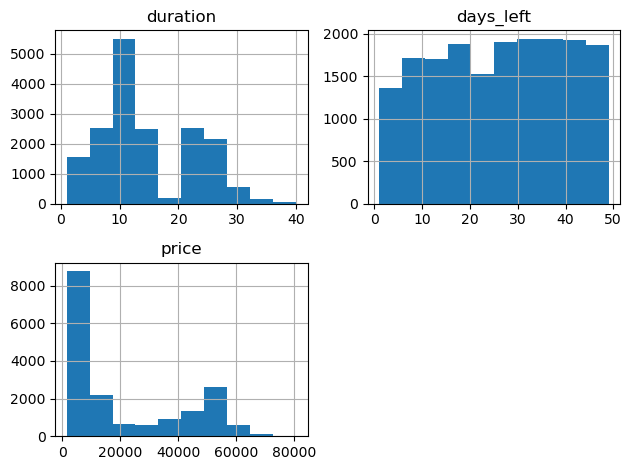

In [9]:
# detect outliers with histogram   
import matplotlib.pyplot as plt
df[['duration', 'days_left', 'price']].hist()
plt.tight_layout()

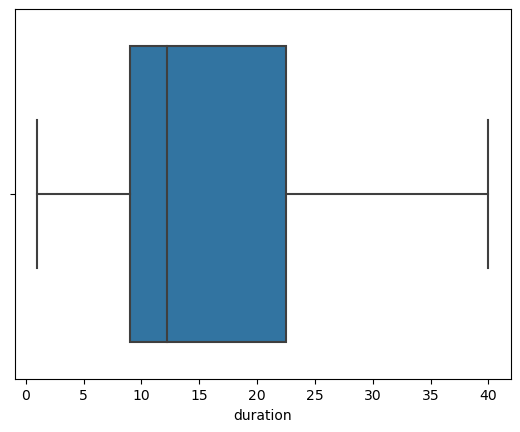

In [10]:
# detect outliers with boxplots for these variables: 
import seaborn
boxplot = seaborn.boxplot(x='duration', data = df)

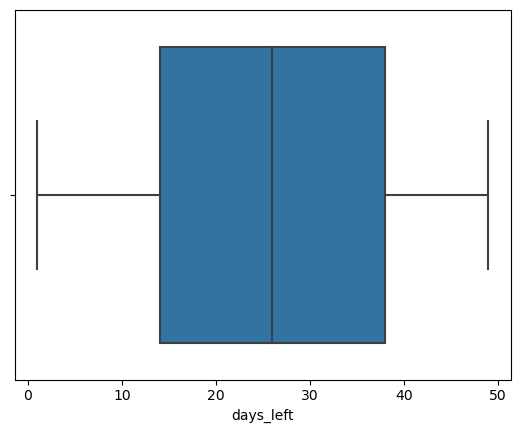

In [11]:
# detect outliers with boxplots for these variables: 
import seaborn
boxplot = seaborn.boxplot(x='days_left', data = df)

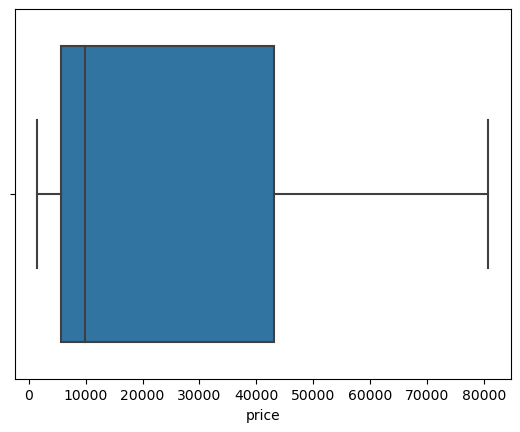

In [12]:
# detect outliers with boxplots for these variables: 
import seaborn
boxplot = seaborn.boxplot(x='price', data = df)

In [13]:
# There are not any outliers detected. No further actions needed here.

Text(0, 0.5, 'price')

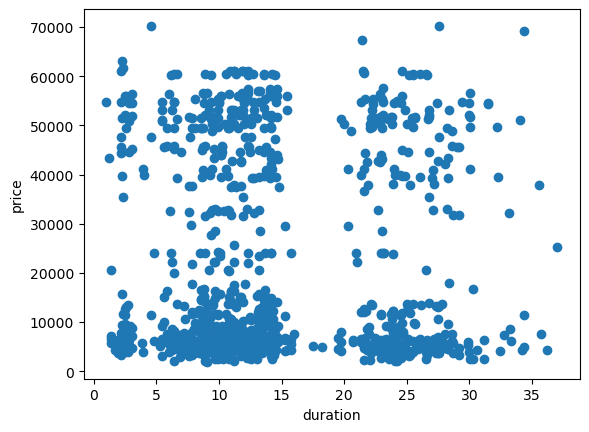

In [14]:
# Bivariate visualizations: between dependent variable price and independent variables
# Create scatterplot between price and duration
plt.scatter(df['duration'].sample(1000), df['price'].sample(1000))
plt.xlabel('duration')
plt.ylabel('price')

Text(0, 0.5, 'price')

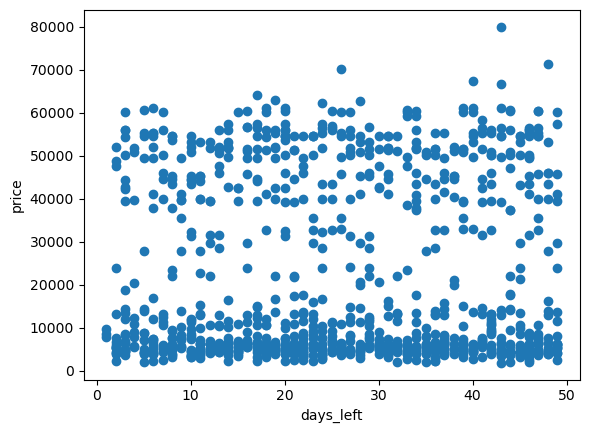

In [15]:
# Bivariate visualizations: between dependent variable price and independent variables
# Create scatterplot between price and days_left
plt.scatter(df['days_left'].sample(1000), df['price'].sample(1000))
plt.xlabel('days_left')
plt.ylabel('price')

In [16]:
# Remove variables that will not be needed for the analysis
df = df.drop(columns=['Unnamed: 0', 'airline', 'arrival_time', 'destination_city', 'flight', 'source_city', 
                      'departure_time', 'stops', 'duration'], axis=1)
df

,class,days_left,price
42,Economy,1,12150
51,Economy,1,12990
113,Economy,1,23206
114,Economy,1,24540
117,Economy,1,29580
...,...,...,...
300094,Business,48,51345
300098,Business,48,51345
300112,Business,49,39432
300141,Business,49,51345


In [17]:
# check the columns left
df.columns

Index(['class', 'days_left', 'price'], dtype='object')

In [18]:
# Create a 0/1 variable for Economy, if class is Economy, DummyEconomy is 1, else it is 0.
df['DummyEconomy'] = [1 if v == 'Economy' else 0 for v in df['class']]

In [19]:
# Exclude the categorical variable class from the data set
df = df[['days_left', 'DummyEconomy', 'price']]

In [20]:
# export prepared data set
df.to_csv('df_prepared.csv')

In [21]:
# Check the columns in the data set that we have
print(df.columns)

Index(['days_left', 'DummyEconomy', 'price'], dtype='object')


In [22]:
# get the basic statistical details of the dataset
df.describe()

,days_left,DummyEconomy,price
count,17768.000000,17768.000000,17768.000000
mean,26.034219,0.630516,21747.785007
std,13.696645,0.482679,20184.490032
min,1.000000,0.000000,1526.000000
25%,14.000000,0.000000,5587.500000
50%,26.000000,1.000000,9828.000000
75%,38.000000,1.000000,43165.000000
max,49.000000,1.000000,80756.000000


In [23]:
# create the multiple linear regression model
from sklearn import linear_model
import statsmodels.api as sm

x = df[['days_left', 'DummyEconomy']]
y = df['price']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x) # adding a constant
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 50095.3931944255
Coefficients: 
 [  -144.7275036  -38983.56088327]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                 6.723e+04
Date:                Fri, 17 Nov 2023   Prob (F-statistic):               0.00
Time:                        23:28:01   Log-Likelihood:            -1.8226e+05
No. Observations:               17768   AIC:                         3.645e+05
Df Residuals:                   17765   BIC:                         3.645e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

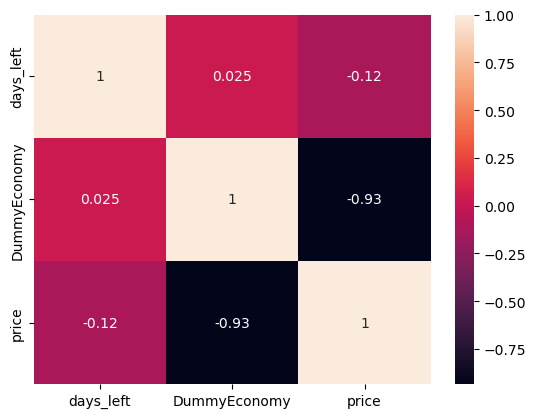

In [24]:
# Run Seaborn heatmap for df
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(), annot=True)
plt.show()

In [25]:
#checking multicollinearity by VIF (Variance Inflation Factor) 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the independent variables set
X = df[['days_left','DummyEconomy']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

        feature       VIF
0     days_left  2.015739
1  DummyEconomy  2.015739


eval_env: 1


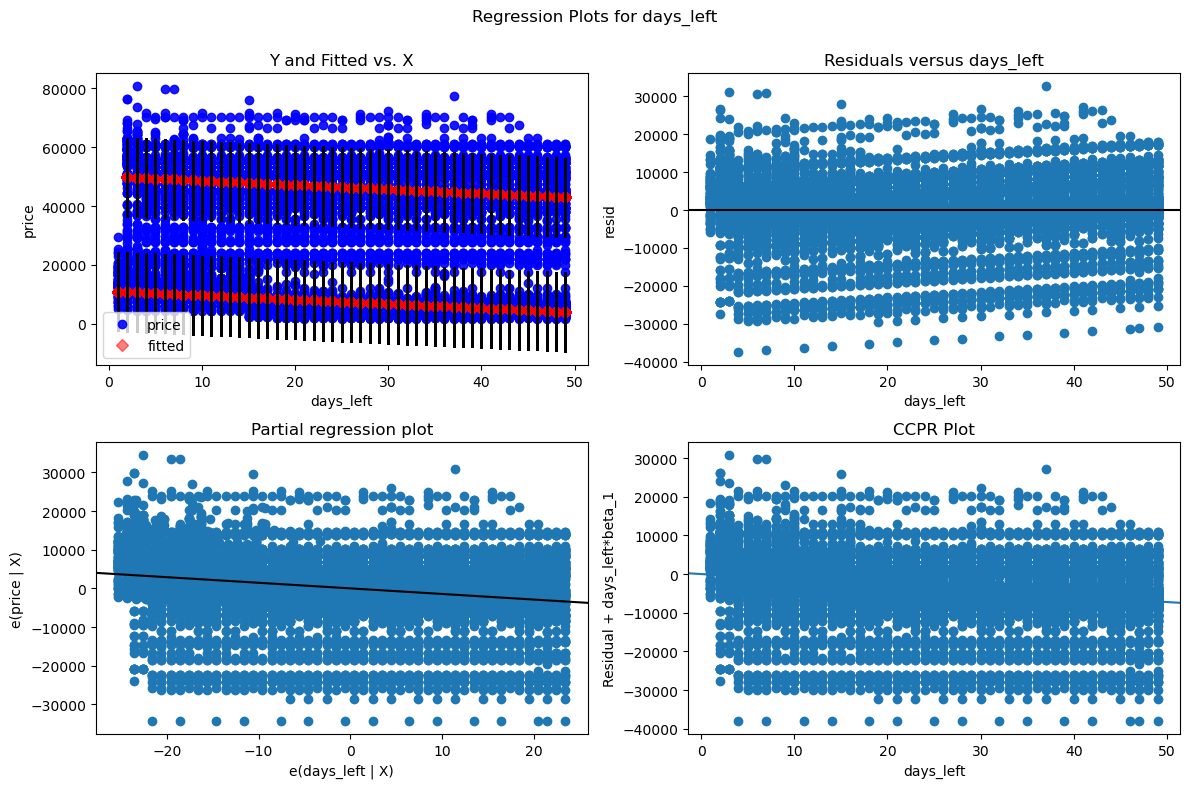

In [26]:
#create residual vs. predictor plot for 'days_left'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'days_left', fig=fig)

eval_env: 1


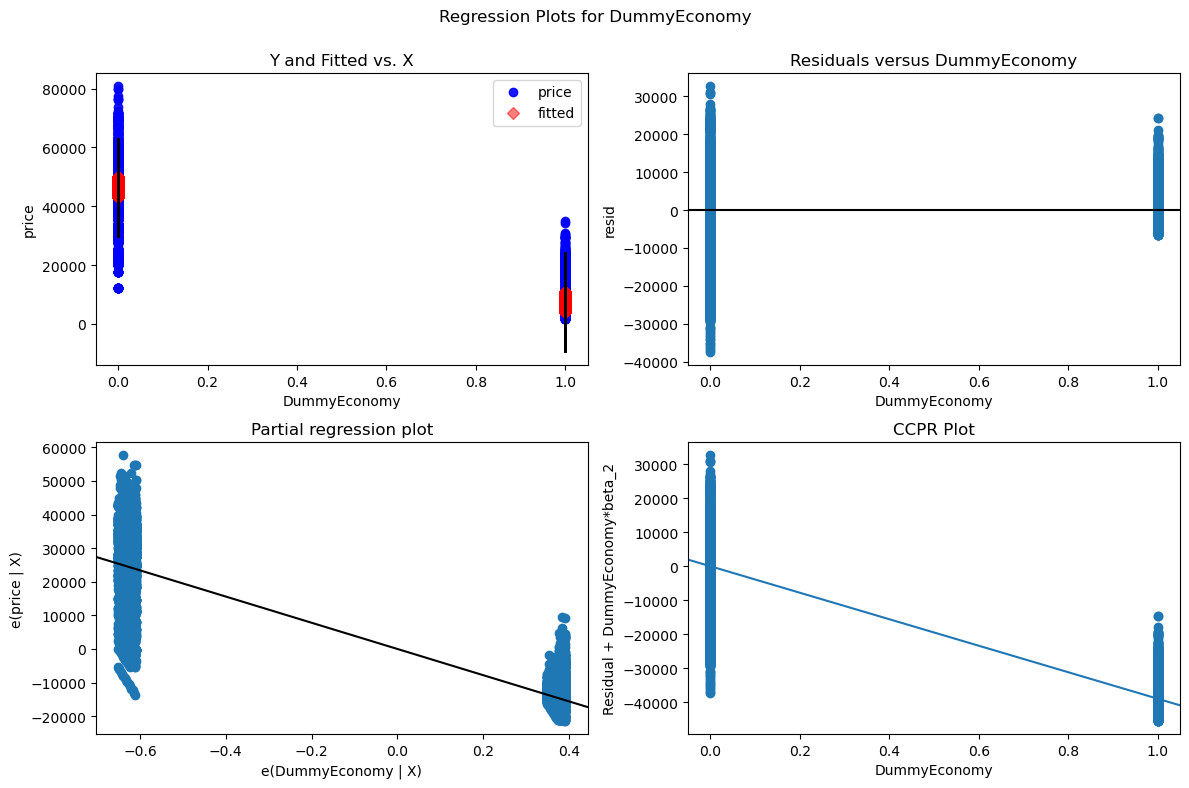

In [27]:
#create residual vs. predictor plot for 'DummyEconomy'
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'DummyEconomy', fig=fig)

In [28]:
# model estimated residual standard error
print(np.sqrt(model.mse_resid))

6895.58049405355
